In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


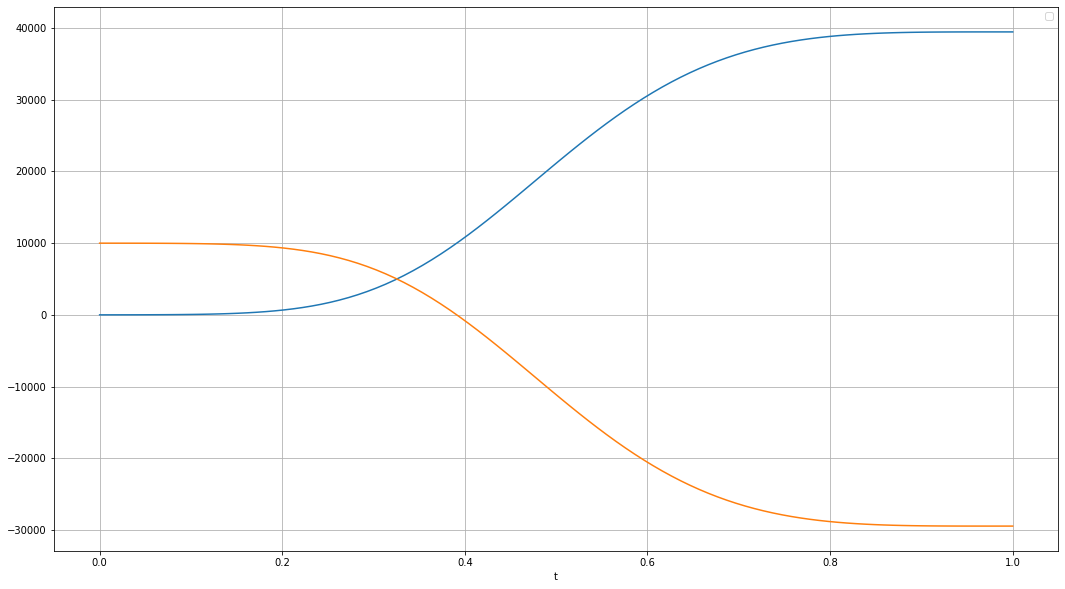

In [17]:

p_values = np.linspace(0,1, 100)
N_seeds = 2
gamma = 0.01
alpha = 0.0000002

results = {"e": [], "g": []}
last_g = []
last_e = []

for p in p_values:
    
    equations = np.array([
        # g                   , e
        [-alpha        , -(1-(1-p)**4-gamma)   ], # first equation
        [alpha         , (1-(1-p)**4-gamma)    ], # second equation
    ])

    F = lambda t, s: np.dot(equations, s)

    t_eval = np.arange(0, 10, 0.01)
    sol = solve_ivp(F, [0, 10], [10000, N_seeds], t_eval=t_eval)

    results["g"].append(sol.y.T[:, 0])
    results["e"].append(sol.y.T[:, 1])
    last_g.append(sol.y.T[-1, 0])
    last_e.append(sol.y.T[-1, 1])

plt.figure(figsize = (18, 10))

plt.plot(p_values, last_e)
plt.plot(p_values, last_g)
    
plt.xlabel('t')
plt.legend()

plt.grid()

plt.show()